**Intervalo de Confiança - COVID 19**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset3 = pd.read_csv('DatasetCovidTratado2.csv',encoding='utf-8')

In [ ]:
#Features/Previsores e a Target/Classe
previsores = dataset3.iloc[:, 0:96].values # da primeira coluna a penultima
classe     = dataset3.iloc[:,96].values # Coluna Classif OMS

# Nota: "banco de dados tratado" tem entradas não numéricas, eu usei o get_dummies conforme orientação.
previsores = pd.DataFrame(previsores)
previsores = pd.get_dummies(previsores)

# COMENTÁRIO

Ao utilizar o get_dummies é preciso remover uma das colunas a fim de evitar dependência liear entre elas.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde
https://stackoverflow.com/questions/31498390/how-to-get-pandas-get-dummies-to-emit-n-1-variables-to-avoid-collinearity

In [ ]:
# 70% treinamento e 30% teste
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe,test_size=0.30, random_state=0)

In [ ]:
# Demanda-2- Remoção das linahs solicitadas + ajustes em outras linhas

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,ShuffleSplit

param_grid = {
      'bootstrap': [True, False],
      'max_depth': [20,25,100],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [2, 5],
      'n_estimators': [100, 200]
  }

classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                            cv = 10, n_jobs = -1, verbose = 2)

# uso as novas variaveis (train e test) após divisão dos dados com train_test_split  
X_train, X_test = previsores_treinamento, previsores_teste
y_train, y_test = classe_treinamento, classe_teste
  
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


{'bootstrap': False, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


**Regressão Logistica**

In [ ]:
# 3) Demanda-3- Tirei a estrutura de repetição for e calculei a validação cruzada corretamente
# Observação 1: a validação cruzada se faz na parte de treino
# Observação 2 : tinha criado um array de 10 modelos, o que é desnecessário por isso foi pedido para "tirar o for"

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score

#Cria modelo
logistic_regression= LogisticRegression()
logistic_regression_sem_treino = logistic_regression

#Treina o modelo
logistic_regression.fit(X_train,y_train)

#matriz de confusão
y_pred=logistic_regression.predict(X_test)
matrix =confusion_matrix(y_test,y_pred)

#cross validation para obter a acurácia e a precisão , k =cv =10
acuracia = cross_validate(logistic_regression, X_train, y_train, cv=10,
                         scoring='accuracy')

precisao = precision_score(y_test, y_pred,average='weighted')

print("Acurácia = " + str(acuracia['test_score'].mean()))
print("Precisão = "+ str(precisao))

#print(classification_report(y_test,logistic_regression.predict(X_test)))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

Acurácia = 0.71274509803921566
Precisão = 0.7025967143614202


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **COMENTÁRIO**

Lembrando que a validação cruzada foi utilizada apenas na acurácia. Cuidado na hora de escrever.

**Intervalo de confiança da acurácia da regressão logística**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

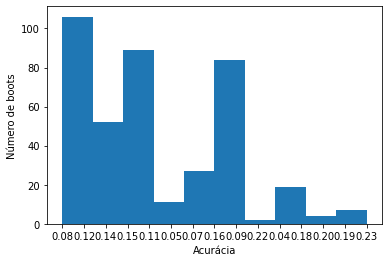

Intervalo de confiança : [0.05,0.19]


In [ ]:
import random
import numpy as np
import plotly.express as px

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
# Notar que, obiviamente, o cálculo da confiança da métrica acurácia usa o (X_test = previsores_teste)

def new_boot(treino):
  boot = treino.sample(n = len(X_test), replace = True)
  return boot

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(boot):
  acuracia = classification_report(y_test,logistic_regression.predict(boot))
  acuracia_string = str(acuracia)
  empassant = "accuracy                           "
  index_acuracia = acuracia_string.find(empassant)  
  x = len(empassant)
  acuracia_valor =  acuracia_string[index_acuracia +x:index_acuracia +x+4]                       
  return acuracia_valor

# calcula a distribuição dos boots
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  lista_boots.append(pegar_acuracia_do_relatorio(new_boot(X_test)))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

# **COMENTÁRIO**

Qual a fonte para a fórmula do intervalo de confiança? E sem o boot, considerando todo o conjunto de treinamento, qual o valor da acurácia do modelo? Pois se seu intervalo de confiança estiver correto, e for o intervalo de confiança do modelo, todos estão bem ruins.

No lugar de usar classification_report, porque não usou direto o cálculo da acurária, eveitando assim os Warnings?

**Rede Neural**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# rede neural
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 100000, random_state=0)
model_sem_treino = model
model.fit(X_train,y_train)

#matriz de confusão
y_pred=model.predict(X_test)
matrix =confusion_matrix(y_test,y_pred)

#cross validation para obter a acurácia e a precisão , k =cv =10
acuracia = cross_validate(model, X_train, y_train, cv=10,
                         scoring='accuracy')

precisao = precision_score(y_test, y_pred,average='weighted')

print("Acurácia = " + str(acuracia['test_score'].mean()))
print("Precisão = "+ str(precisao))

#print(classification_report(y_test,model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Acurácia = 0.74477124183006538
Precisão = 0.77501072501072504


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Intervalo de confiança rede neural**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

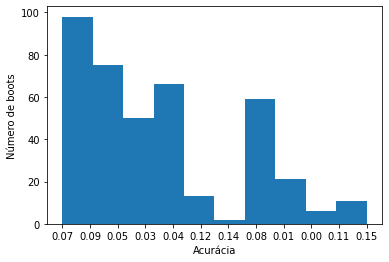

Intervalo de confiança : [0.01,0.12]


In [ ]:
import random
import numpy as np
import plotly.express as px

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas

def new_boot(treino):
  boot = treino.sample(n = len(X_test), replace = True)
  return boot

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(boot):
  acuracia = classification_report(y_test,model.predict(boot))
  acuracia_string = str(acuracia)
  empassant = "accuracy                           "
  index_acuracia = acuracia_string.find(empassant)  
  x = len(empassant)
  acuracia_valor =  acuracia_string[index_acuracia +x:index_acuracia +x+4]                       
  return acuracia_valor


# calcula a distribuição dos boots
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  lista_boots.append(pegar_acuracia_do_relatorio(new_boot(X_test)))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")


# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

modelRF = RandomForestClassifier(bootstrap = False, max_depth = 100, 
                                    max_features = 'sqrt', min_samples_leaf = 3,
                                    min_samples_split = 5, n_estimators = 100)

modelRF_sem_treino = modelRF
modelRF.fit(X_train,y_train)

#matriz de confusão
y_pred=modelRF.predict(X_test)
matrix =confusion_matrix(y_test,y_pred)

#cross validation para obter a acurácia e a precisão , k =cv =10
acuracia = cross_validate(modelRF, X_train, y_train, cv=10,
                         scoring='accuracy')

precisao = precision_score(y_test, y_pred,average='weighted')

print("Acurácia = " + str(acuracia['test_score'].mean()))
print("Precisão = "+ str(precisao))

#print(classification_report(y_test,modelRF.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Acurácia = 0.76078431372549014
Precisão = 0.73246793591621177


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Intervalo de confiança para floresta randomica**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

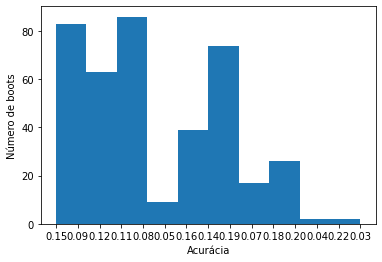

Intervalo de confiança : [0.05,0.19]


In [ ]:
import random
import numpy as np
import plotly.express as px

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas

def new_boot(treino):
  boot = treino.sample(n = len(X_test), replace = True)
  return boot

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(boot):
  acuracia = classification_report(y_test,modelRF.predict(boot))
  acuracia_string = str(acuracia)
  empassant = "accuracy                           "
  index_acuracia = acuracia_string.find(empassant)  
  x = len(empassant)
  acuracia_valor =  acuracia_string[index_acuracia +x:index_acuracia +x+4]                       
  return acuracia_valor

# calcula a distribuição dos boots
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  lista_boots.append(pegar_acuracia_do_relatorio(new_boot(X_test)))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Regressão (logistic_regression_sem_treino) e Rede neural (model_sem_treino)

t, p = paired_ttest_5x2cv(estimator1=logistic_regression_sem_treino,estimator2=model_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


t statistic: 2.889
aplha  0.05
p value: 0.034
Reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Regressão (logistic_regression_sem_treino) e Floresta randomica (modelRF_sem_treino)

t, p = paired_ttest_5x2cv(estimator1=logistic_regression_sem_treino,estimator2=modelRF_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


t statistic: 0.473
aplha  0.05
p value: 0.656
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Rede Neural e Floresta randomica

t, p = paired_ttest_5x2cv(estimator1=model_sem_treino,estimator2=modelRF_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

t statistic: -1.703
aplha  0.05
p value: 0.149
Fail to reject null hypotesis
